# Individual Coding Assignment.
## By Adam Kaba

The purpose of this notebook is to experiment more with the assignment from last week. I ran into a lot of memory issues last week so I wasnt able to do as much as I wanted. I figured I'd try to see how I can use less memory and create some different visualizations

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

Load in the data just like in last weeks assignment. Create less variables in the process

In [2]:
olympics = pd.merge(pd.read_csv("athlete_events.csv"),pd.read_csv("noc_regions.csv"), on = "NOC")
print(olympics.shape)
olympics.head()

(270767, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [3]:
olympics = olympics.dropna(axis=0,how="all")
olympics = olympics.drop(["ID", "Name", "Games", "notes"], axis = 1)

In [4]:
pop = pd.merge(pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1976634.csv'),
               pd.read_csv("Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_1976634.csv"), 
               on= "Country Code")
print(pop.shape)
pop.head()

(263, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,104872.0,105366.0,105845.0,106314.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,35383128.0,36296400.0,37172386.0,38041754.0,NaN,South Asia,Low income,NaN,Afghanistan,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,28842484.0,29816748.0,30809762.0,31825295.0,NaN,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2876101.0,2873457.0,2866376.0,2854191.0,NaN,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,77297.0,77001.0,77006.0,77142.0,NaN,Europe & Central Asia,High income,NaN,Andorra,NaN


In [5]:
olympics = olympics.rename(columns = {"region": "Country Name" })
olympics = pd.merge(olympics,pop, on = "Country Name")

In [6]:
del pop

In [7]:
geo= gpd.read_file("countries.geojson")
geo = geo.rename(columns = {"ADMIN": "Country", "ISO_A3": "Country Code"})
geo.head()

,Country,Country Code,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [8]:
df = geo.merge(olympics, on = "Country Code")

df.head()

,Country,Country Code,geometry,Sex,Age,Height,Weight,Team,NOC,Year,...,2016,2017,2018,2019,2020,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",M,18.0,176.0,72.0,Aruba,ARU,2000,...,104872.0,105366.0,105845.0,106314.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",M,22.0,176.0,72.0,Aruba,ARU,2004,...,104872.0,105366.0,105845.0,106314.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
2,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",M,21.0,185.0,83.0,Aruba,ARU,2004,...,104872.0,105366.0,105845.0,106314.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
3,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",M,23.0,170.0,73.0,Aruba,ARU,1992,...,104872.0,105366.0,105845.0,106314.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
4,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",M,27.0,170.0,73.0,Aruba,ARU,1996,...,104872.0,105366.0,105845.0,106314.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN


Reduce the amount of columns in df

In [9]:
df = df[["Country" ,"Team", "Year", "Age", "Medal", "IncomeGroup", "Sport","geometry", "1970", "2016"]]


In [10]:
#df.plot(column = "2016", scheme = "quantiles")

I decided to create a whole new dataframe, and just import data from the original df in order to supplement it. The smaller dimensions take up less memory.

In [11]:
a= df["Country"].value_counts()
newdf= pd.DataFrame()
newdf["Country"] = a.index
newdf["Number of Athletes"] = list(a)
newdf


,Country,Number of Athletes
0,Germany,15883
1,France,12758
2,Italy,10715
3,Canada,9734
4,Japan,8444
...,...,...
164,Marshall Islands,14
165,Nauru,13
166,Kiribati,11
167,East Timor,9


In [12]:
df2 = geo.merge(newdf, on = "Country")
df2

,Country,Country Code,geometry,Number of Athletes
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",42
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",126
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",267
3,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",70
4,Andorra,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",169
...,...,...,...,...
164,Vanuatu,VUT,"MULTIPOLYGON (((169.83815 -20.24863, 169.83009...",35
165,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",63
166,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",1711
167,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",183


I created some new variables, and normalized them with respect to other countries

In [14]:
df2["2016 Population"] = df["2016"].unique()
df2["2016 Population"] = df2["2016 Population"]/df2["2016 Population"].max()

df2["1970 Population"] = df["1970"].unique()
df2["1970 Population"] = df2["1970 Population"]/df2["1970 Population"].max()

df2["Population Change"] = df2["2016 Population"] - df2["1970 Population"]
df2["Population Change"] = df2["Population Change"]/df2["Population Change"].max()
df2

,Country,Country Code,geometry,Number of Athletes,2016 Population,1970 Population,Population Change
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",42,0.000076,0.000072,0.000014
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",126,0.025665,0.013654,0.042550
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",267,0.020921,0.007198,0.048616
3,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",70,0.002086,0.002610,-0.001854
4,Andorra,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",169,0.000056,0.000030,0.000094
...,...,...,...,...,...,...,...
164,Vanuatu,VUT,"MULTIPOLYGON (((169.83815 -20.24863, 169.83009...",35,0.000202,0.000104,0.000346
165,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",63,0.000141,0.000175,-0.000120
166,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",1711,0.040767,0.026970,0.048880
167,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",183,0.011869,0.005107,0.023957


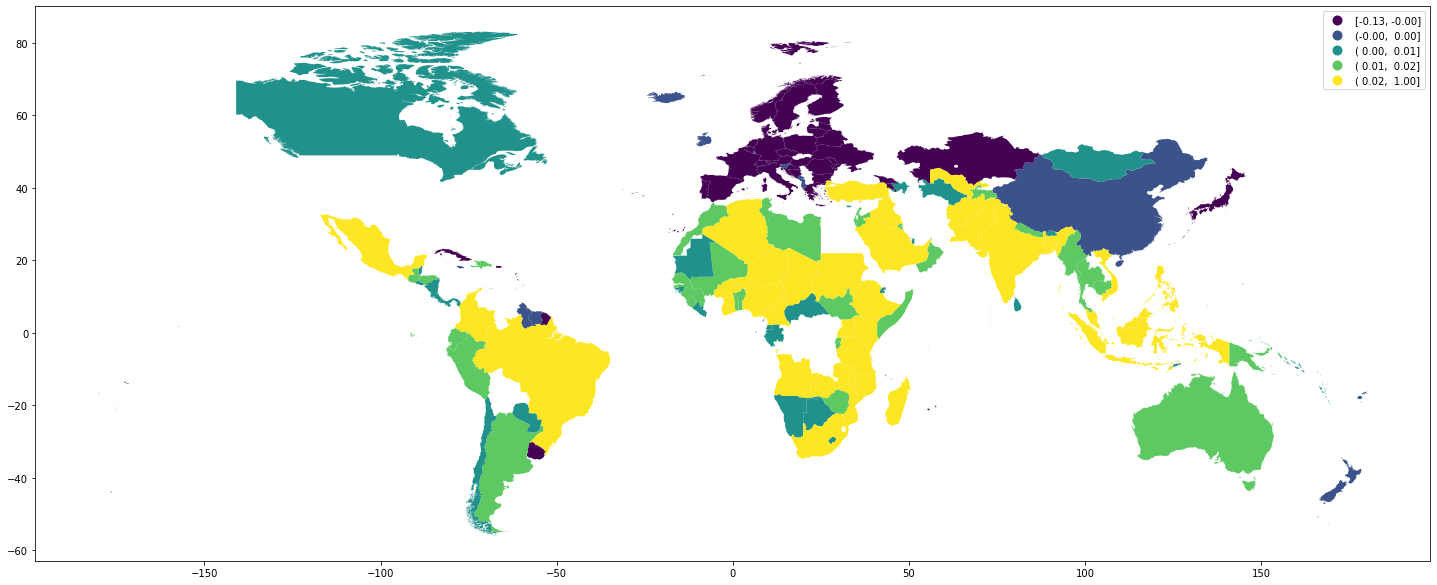

In [15]:
df2.plot("Population Change",scheme="quantiles",
           figsize=(25, 25),
           legend=True,
            title = "Population Change in Countries")

[Text(0.5, 1.0, 'Population ratio in 2016')]

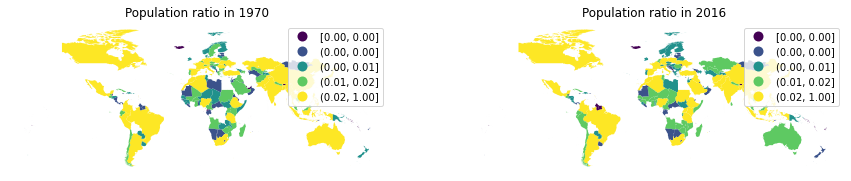

In [30]:
fig, ax = plt.subplots(1,2,figsize=(15, 15))
df2.plot("1970 Population",scheme="quantiles",
            figsize = (10,10),
           legend=True,
             ax = ax[0])

df2.plot("2016 Population",scheme="quantiles",
             figsize = (10,10),
           legend=True,
             ax = ax[1])

ax[0].axis("off")
ax[1].axis("off")

ax[0].set(title = "Population ratio in 1970")
ax[1].set(title = "Population ratio in 2016")

In [17]:
gdf_web_mercator = df2.to_crs(epsg=3857)

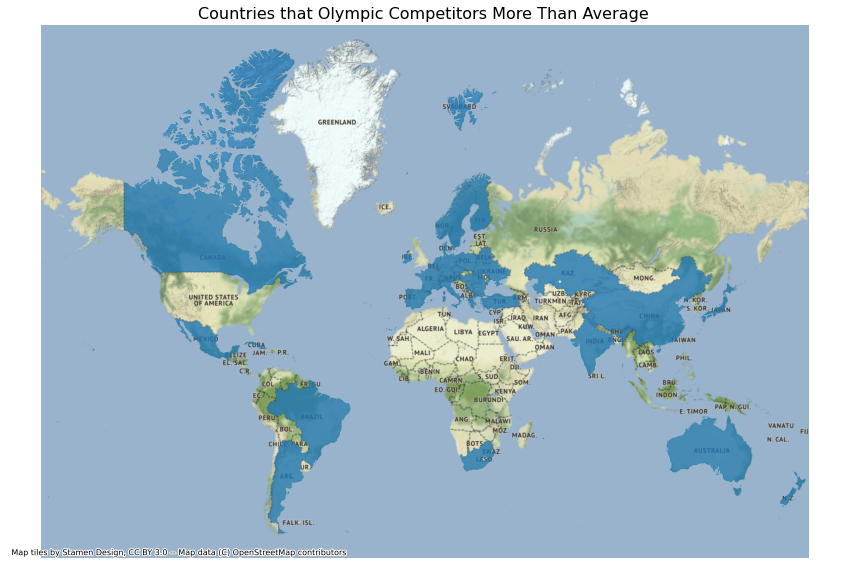

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf_web_mercator[gdf_web_mercator['Number of Athletes'] > df2['Number of Athletes'].mean()].plot(ax=ax, alpha=0.8)

ax.axis('off')
ax.set_title('Countries that Olympic Competitors More Than Average ',fontsize=16)
ctx.add_basemap(ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf_web_mercator[gdf_web_mercator['Number of Athletes'] > df2['Number of Athletes'].mean()].plot(ax=ax, alpha=0.8)

ax.axis('off')
ax.set_title('Countries that Olympic Competitors More Than Average ',fontsize=16)
ctx.add_basemap(ax)

In the end, I was able to do much more with the data I have. However some countries such America get lost in translation, most likely when I'm merging all of the datasets. So I need to look into ways to keep less data from getting lost.
I also realized that I wasn't able to add Income Groups to the new dataset using the same methods, so I'll need to look into that more as well.

The memory problem is still somewhat there but I'm finding more ways to work around it, it might just be that my dataset is too big.